# Handwriting recognition

## Data import and visualization

Import the MNIST train dataset ([https://en.wikipedia.org/wiki/MNIST_database](https://en.wikipedia.org/wiki/MNIST_database))


*   28x28 pixels images => 784 elements for each image
*   20000 images and 20000 labels associated with them



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# This dataset is contained in the sample data directory of Google Colab online runtimes
data = np.genfromtxt('sample_data/mnist_train_small.csv', delimiter=',')
data.shape

(20000, 785)

Store the data in a matrix and the labels in a vector


*   A = images
*   labels from 0 to 9 



In [ ]:
labels = data[:,0]
A = data[:,1:].transpose()
labels.shape, A.shape

((20000,), (784, 20000))

In [ ]:
# labels[0] , A[:,0] image 0 with label=labels[0]

(6.0, array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  24.,  67.,  67.,  18.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  

Visualize the first 30 pictures with the corresponding labels

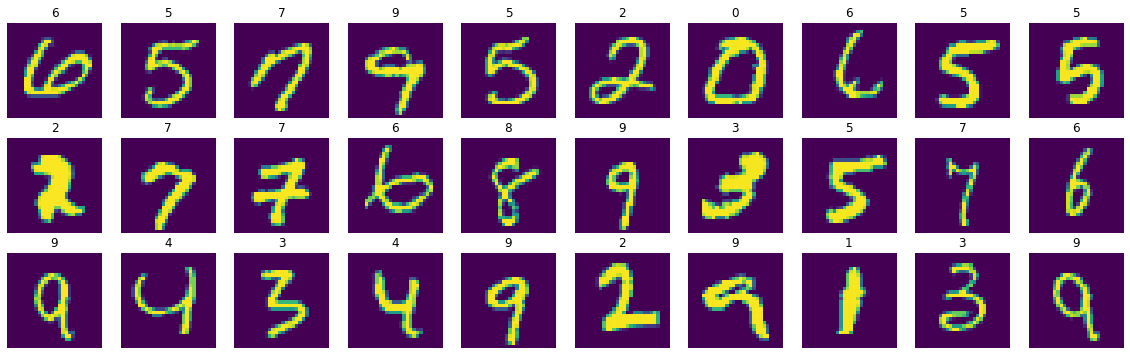

In [ ]:
fig, axs = plt.subplots(3,10, figsize=(20,6))
axs = axs.flatten()
for i in range(30):
  axs[i].imshow(np.reshape(A[:,i], (28,28)))
  axs[i].set_title(str(int(labels[i])))
  axs[i].axis('off')

Visualize the first 30 pictures corresponding the the digit "2"

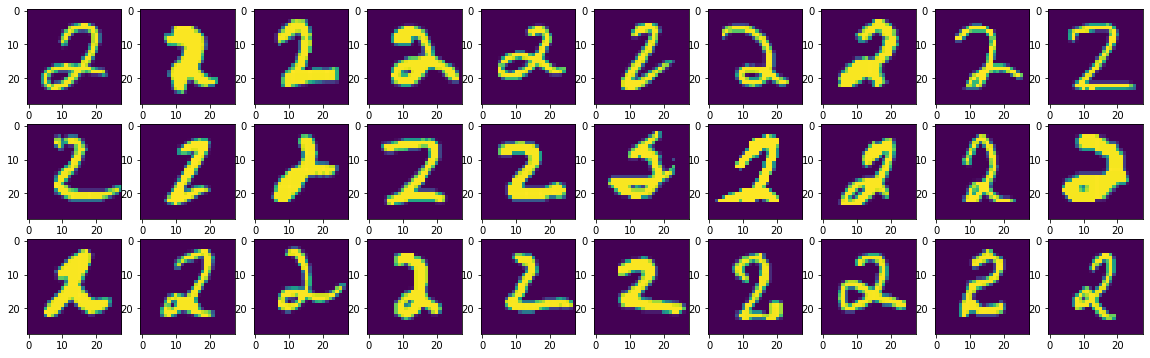

In [ ]:
labels_2 = data[data[:,0]==2,0]
labels_2
A_2 = data[data[:,0]==2,1:].transpose()
fig, axs = plt.subplots(3,10, figsize=(20,6))
axs = axs.flatten()
for i in range(30):
  axs[i].imshow(np.reshape(A_2[:,i], (28,28)))

## Principal Component Analysis

### Whole dataset

Compute and visualize the average of the training data

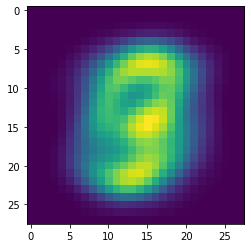

In [ ]:
A_mean = np.mean(A, axis=1)
plt.imshow(np.reshape(A_mean, (28,28))) #we can add cmap='gray'

Perform PCA on the data. Then, plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

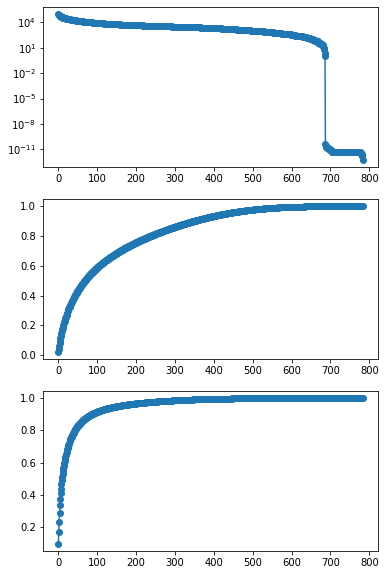

In [ ]:
#svd
U, s, VT = np.linalg.svd(A - A_mean[:,None], full_matrices = False)

fig, axs = plt.subplots(3,1, figsize=(6,10),)

axs[0].semilogy(s, 'o-') #the behaviour shown in this figure is due to the variability of our samples
                         #huge drop caused by the 0's pixels in which we do not have anything.. e.g. is the purple parte in the previous plotted image of the mean of A
axs[1].plot(np.cumsum(s)/np.sum(s), 'o-')
axs[2].plot(np.cumsum(s**2)/np.sum(s**2), 'o-')

Visualize the first 30 principal axes

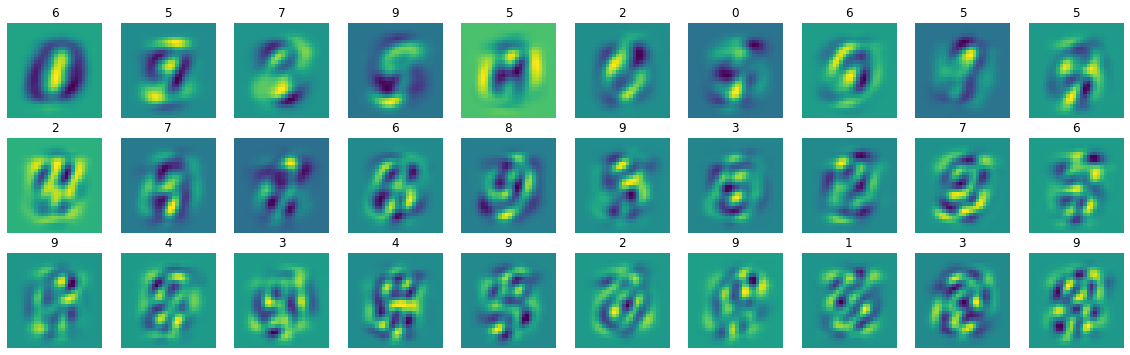

In [ ]:
fig, axs = plt.subplots(3,10, figsize=(20,6))
axs = axs.flatten()
for i in range(30):
  axs[i].imshow(np.reshape(U[:,i], (28,28)))
  axs[i].set_title(str(int(labels[i])))
  axs[i].axis('off')

We can see that by increasing the index we describes the more thiny details..

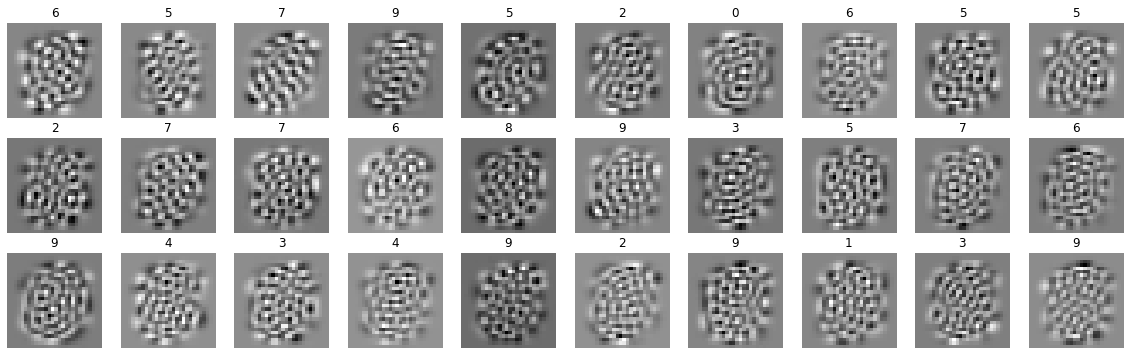

In [ ]:
fig, axs = plt.subplots(3,10, figsize=(20,6))
axs = axs.flatten()
for i in range(30):
  axs[i].imshow(np.reshape(U[:,i+100], (28,28)),cmap = 'gray')
  axs[i].set_title(str(int(labels[i])))
  axs[i].axis('off')

As we go on, we are going to see what happens in the borders of the image.. that in practice are features we do not use

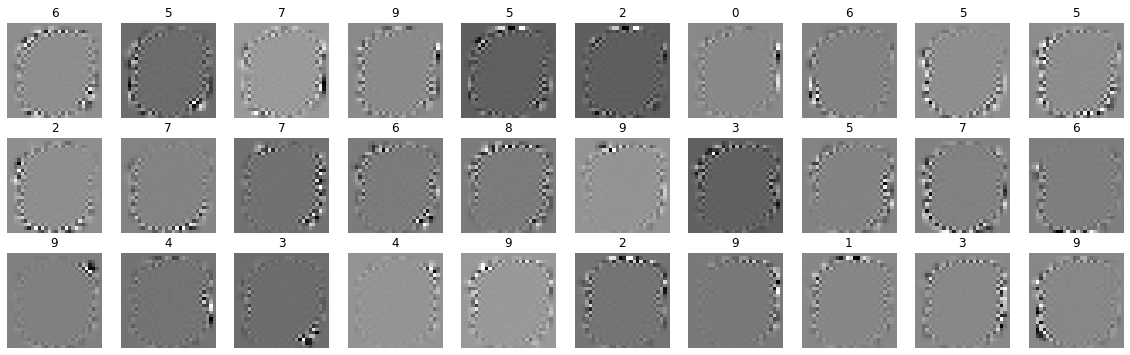

In [ ]:
fig, axs = plt.subplots(3,10, figsize=(20,6))
axs = axs.flatten()
for i in range(30):
  axs[i].imshow(np.reshape(U[:,i+500], (28,28)),cmap = 'gray')
  axs[i].set_title(str(int(labels[i])))
  axs[i].axis('off')

Compute the first two principal components corresponding to the first image

In [ ]:
pc_11 = np.inner(A[:,0] - A_mean, U[:,0])
pc_21 = np.inner(A[:,0] - A_mean, U[:,1])
pc_11 , pc_21 #first two principal components of the first image are: ...

(-302.04575127639947, -12.674243621507046)

Define a matrix corresponding all the principal components of all the images, and check the result of the previous point

In [ ]:
A_pc = U.transpose() @ (A - A_mean[:,None])
A_pc[0,0], A_pc[1,0] 

(-302.04575127639947, -12.67424362150697)

Create a scatterplot for the first 2 principal components of all the training images, grouped by label.

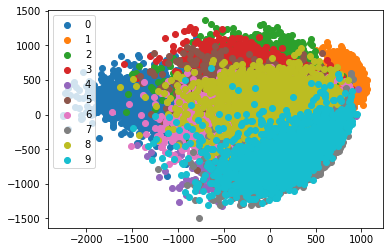

In [ ]:
for i in range(10):
  plt.scatter(A_pc[0, labels==i], A_pc[1, labels==i], label=str(int(i)))
plt.legend()

Repeat the previous point, by making a separate plot for each label

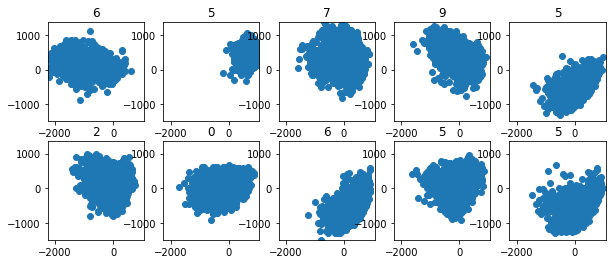

In [ ]:
fig, axs = plt.subplots(2,5, figsize=(10,4))
axs = axs.flatten()
for i in range(10):
  axs[i].scatter(A_pc[0, labels==i], A_pc[1, labels==i], label=str(int(i)))
  axs[i].set_title(str(int(labels[i])))
  
  axs[i].set_xlim((np.min(A_pc[0,:]), np.max(A_pc[0,:])))
  axs[i].set_ylim((np.min(A_pc[1,:]), np.max(A_pc[1,:])))

### Classification of two digits (0 and 9)

We now focus on the digits 0 and 9 only. Build a reduced training dataset containing only images corresponding to these digits.

In [ ]:
#keep only 0s and 9s
indexes = np.logical_or(labels==0,labels==9)
A_reshaped = A[:,indexes]
labels_reshaped = labels[indexes]

Plot the first 30 training images. 

Only 0 and 9 images are shown


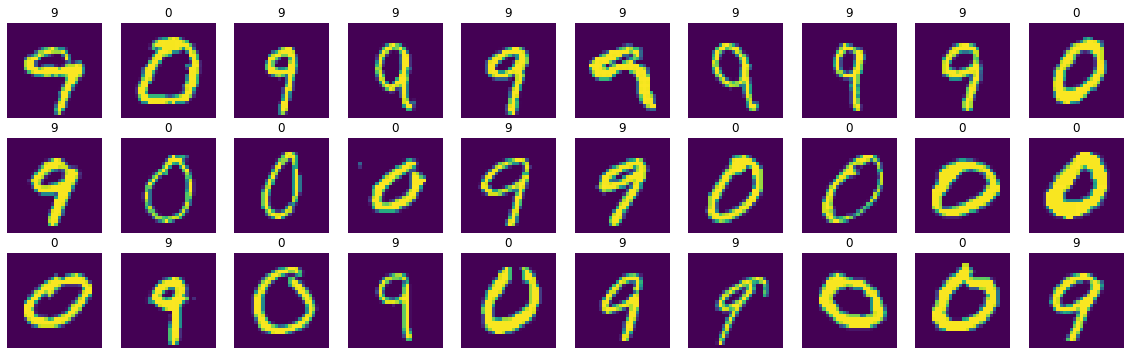

In [ ]:
fig, axs = plt.subplots(3,10, figsize=(20,6))
axs = axs.flatten()
print("Only 0 and 9 images are shown")
for i in range(30):
  axs[i].imshow(np.reshape(A_reshaped[:,i], (28,28)))
  axs[i].set_title(str(int(labels_reshaped[i])))
  axs[i].axis('off')

Perform PCA on the data. Then, plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

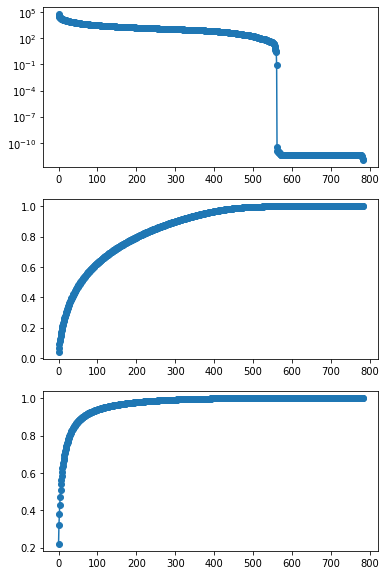

In [ ]:
#svd
U, s, VT = np.linalg.svd(A_reshaped - np.mean(A_reshaped, axis=1)[:,None], full_matrices = False)

fig, axs = plt.subplots(3,1, figsize=(6,10),)

axs[0].semilogy(s, 'o-') 
axs[1].plot(np.cumsum(s)/np.sum(s), 'o-')
axs[2].plot(np.cumsum(s**2)/np.sum(s**2), 'o-')

Create a scatterplot for the first 2 principal components of all the training images, grouped by label. Consider only the first 500 pictures.

In [ ]:
A_reshaped_pc = U.transpose() @ (A_reshaped - np.mean(A_reshaped, axis=1)[:,None])
A_reshaped_pc.shape

(784, 3985)

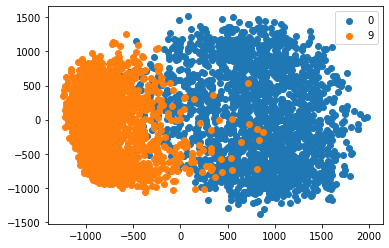

In [ ]:
digits = (0,9)
for i in digits:
  plt.scatter(A_reshaped_pc[0, labels_reshaped==i], A_reshaped_pc[1, labels_reshaped==i], label=str(int(i)))

plt.legend()


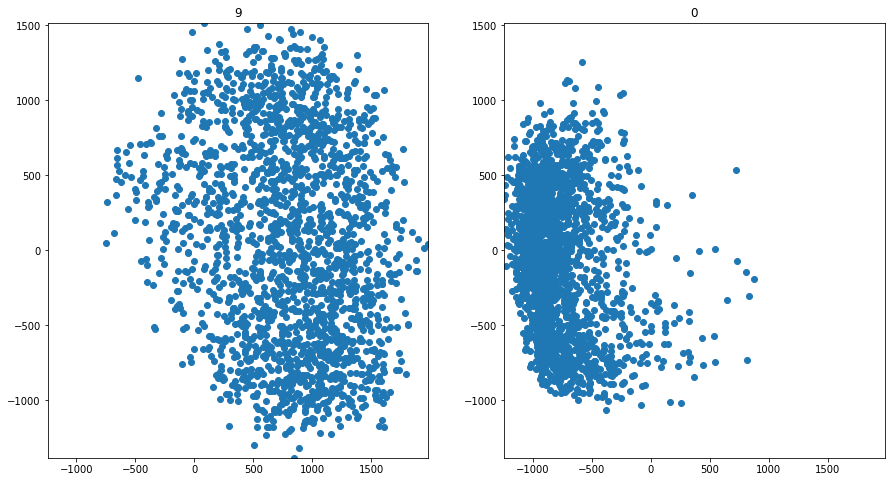

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,8))
axs = axs.flatten()
k=0
for i in digits:
  axs[k].scatter(A_reshaped_pc[0, labels_reshaped==i], A_reshaped_pc[1, labels_reshaped==i], label=str(int(i)))
  axs[k].set_title(str(int(labels_reshaped[i])))
  
  axs[k].set_xlim((np.min(A_reshaped_pc[0,:]), np.max(A_reshaped_pc[0,:])))
  axs[k].set_ylim((np.min(A_reshaped_pc[1,:]), np.max(A_reshaped_pc[1,:])))
  k=k+1

Define a classifier, by fixing a threshold on the first principal component. Then, test the classifier on the MNIST test dataset. Compute the number of true/false positive/negative for both the digits (confusion matrix) and the accuracy of the classifier.

In [ ]:
# This dataset is contained in the sample data directory of Google Colab online runtimes
data_test = np.genfromtxt('sample_data/mnist_test.csv', delimiter=',')
data_test.shape
A_test = data_test[:,1:].transpose()
labels_test = data_test[:,0]

In [ ]:
A_test.shape, labels_test.shape

((784, 10000), (10000,))

In [ ]:
mask = np.logical_or(labels_test == 0 , labels_test == 9)
labels_test = labels_test[mask]
A_test = A_test[:,mask]

In [ ]:
pc1 = U[:,0].transpose() @ (A_test - np.mean(A_reshaped, axis=1)[:,None])
pc1.shape, A_test.shape

((1989,), (784, 1989))

In [ ]:
T0 = np.sum(np.logical_and(pc1 > 0, labels_test == 0))
F0 = np.sum(np.logical_and(pc1 > 0, labels_test == 9))
T9 = np.sum(np.logical_and(pc1 < 0, labels_test == 9))
F9 = np.sum(np.logical_and(pc1 < 0, labels_test == 0))

print("%d true zeros" % T0)
print("%d false zeros" % F0)
print("%d true nines" % T9)
print("%d false zeros" % F9)

print("accuracy: %f" % ((T0+T9)/(T0+T9+F0+F9)))

927 true zeros
30 false zeros
979 true nines
53 false zeros
accuracy: 0.958270
